In [1]:
import pandas as pd

df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')

In [2]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [3]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
#Merge order products prior with orders and then merge with products
df_order_products_prior = pd.merge(df_order_products_prior, df_products, how='left', on='product_id')

df_prior_user_order_product = pd.merge(df_order_products_prior, df_orders, how='left', on='order_id')


In [5]:
df_prior_user_order_product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


In [6]:
Prior_User_Order_Product_inner = pd.merge(df_prior_user_order_product,
                                          df_orders[df_orders['eval_set']=='train'][['user_id','eval_set']], 
                                          how='inner', on='user_id')

In [7]:
Prior_User_Order_Product_inner.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set_x,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_y
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,train
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,train
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,train
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,train
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,train


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set_x,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_y
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,train
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,train
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,train
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,train
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,train


In [8]:
#deal with white space in product name
Prior_User_Order_Product_inner['product_no_space'] = [e.replace(' ','_') for e in Prior_User_Order_Product_inner.product_name]

In [9]:
Prior_User_Order_Product_inner = Prior_User_Order_Product_inner.drop('product_name',axis=1)
Prior_User_Order_Product_inner.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set_x,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_y,product_no_space
0,2,33120,1,1,86,16,202279,prior,3,5,9,8.0,train,Organic_Egg_Whites
1,2,28985,2,1,83,4,202279,prior,3,5,9,8.0,train,Michigan_Organic_Kale
2,2,9327,3,0,104,13,202279,prior,3,5,9,8.0,train,Garlic_Powder
3,2,45918,4,1,19,13,202279,prior,3,5,9,8.0,train,Coconut_Butter
4,2,30035,5,0,17,13,202279,prior,3,5,9,8.0,train,Natural_Sweetener


,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set_x,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_y,product_no_space
0,2,33120,1,1,86,16,202279,prior,3,5,9,8.0,train,Organic_Egg_Whites
1,2,28985,2,1,83,4,202279,prior,3,5,9,8.0,train,Michigan_Organic_Kale
2,2,9327,3,0,104,13,202279,prior,3,5,9,8.0,train,Garlic_Powder
3,2,45918,4,1,19,13,202279,prior,3,5,9,8.0,train,Coconut_Butter
4,2,30035,5,0,17,13,202279,prior,3,5,9,8.0,train,Natural_Sweetener


In [10]:

user_habit = Prior_User_Order_Product_inner[['user_id','order_id',
                                       'product_no_space','order_dow',
                                       'order_hour_of_day','days_since_prior_order']]

In [11]:
import numpy as np
# Create a dataframe: average value of each user

In [12]:
user_avg = user_habit.groupby('user_id')['order_dow',
                                'order_hour_of_day',
                                'days_since_prior_order'].agg(np.nanmean)

In [13]:
# Total number of orders of each user
user_order = user_habit.groupby('user_id').order_id.nunique()
user_avg['num_of_orders'] = user_order

In [14]:
# Total number of products of each user
product_number = user_habit.groupby('user_id')['order_id'].agg('count')
user_avg['num_of_products'] = product_number

In [15]:
# add product name to each user
name_list = []
for p_name in user_habit.groupby('user_id')['product_no_space']:
        name_list.append(' '.join(p_name[1]))

# add the names to dataframe
user_avg['product_name'] = name_list

In [16]:
user_avg.head()

,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name
user_id,,,,,,
1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...
2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...
5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...
7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...
8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...


,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name
user_id,,,,,,
1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...
2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...
5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...
7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...
8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...


In [17]:
# # Sample a fraction of data due to large computation
# sample_frac = 0.2
# product_name_DF_sample = user_avg.sample(frac = sample_frac, random_state=1)
# sample_user_id  = product_name_DF_sample.index
# print(sample_user_id)

Int64Index([ 93427,  21772,   8699, 181653, 151077, 142317,  32177,  65666,
            200645,  10212,
            ...
              7507, 193735,  36549,  62841,  52520,  47745,  34339, 194635,
            189337, 124461],
           dtype='int64', name='user_id', length=26242)
Int64Index([ 93427,  21772,   8699, 181653, 151077, 142317,  32177,  65666,
            200645,  10212,
            ...
              7507, 193735,  36549,  62841,  52520,  47745,  34339, 194635,
            189337, 124461],
           dtype='int64', name='user_id', length=26242)


In [89]:

# df_temp = product_name_DF_sample.drop_duplicates().groupby('product_name').count()
# print(len(df_temp))

26240
26240


In [90]:
# tokenize the words
from nltk.tokenize import sent_tokenize, word_tokenize

tokenized = user_avg['product_name'].apply(word_tokenize)
tokenized.head()

user_id
1    [Soda, Original_Beef_Jerky, Pistachios, Organi...
2    [Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po...
5    [Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt...
7    [85, %, _Lean_Ground_Beef, Organic_Apple_Slice...
8    [Organic_Baby_Spinach, Michigan_Organic_Kale, ...
Name: product_name, dtype: object

user_id
1    [Soda, Original_Beef_Jerky, Pistachios, Organi...
2    [Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po...
5    [Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt...
7    [85, %, _Lean_Ground_Beef, Organic_Apple_Slice...
8    [Organic_Baby_Spinach, Michigan_Organic_Kale, ...
Name: product_name, dtype: object

In [91]:
tokenized_df = pd.DataFrame(tokenized).reset_index()
tokenized_df.columns = ['user_id', 'products']
tokenized_df.head()

,user_id,products
0,1,"[Soda, Original_Beef_Jerky, Pistachios, Organi..."
1,2,"[Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po..."
2,5,"[Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt..."
3,7,"[85, %, _Lean_Ground_Beef, Organic_Apple_Slice..."
4,8,"[Organic_Baby_Spinach, Michigan_Organic_Kale, ..."


,user_id,products
0,1,"[Soda, Original_Beef_Jerky, Pistachios, Organi..."
1,2,"[Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po..."
2,5,"[Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt..."
3,7,"[85, %, _Lean_Ground_Beef, Organic_Apple_Slice..."
4,8,"[Organic_Baby_Spinach, Michigan_Organic_Kale, ..."


In [92]:
print(len(tokenized_df))

131209
131209


In [20]:
from gensim.models import Word2Vec

In [93]:
word2Vec = Word2Vec(tokenized,min_count=1,size=50)

In [94]:
words = list(word2Vec.wv.vocab)
print(words[0:20])

['Soda', 'Original_Beef_Jerky', 'Pistachios', 'Organic_String_Cheese', 'Organic_Fuji_Apples', 'Honeycrisp_Apples', 'Bartlett_Pears', 'Bag_of_Organic_Bananas', 'Creamy_Almond_Butter', 'Cinnamon_Toast_Crunch', 'XL_Pick-A-Size_Paper_Towel_Rolls', 'Organic_Half_', '&', '_Half', 'Zero_Calorie_Cola', 'Aged_White_Cheddar_Popcorn', 'Organic_Unsweetened_Vanilla_Almond_Milk', 'Milk_Chocolate_Almonds', '0', '%']
['Soda', 'Original_Beef_Jerky', 'Pistachios', 'Organic_String_Cheese', 'Organic_Fuji_Apples', 'Honeycrisp_Apples', 'Bartlett_Pears', 'Bag_of_Organic_Bananas', 'Creamy_Almond_Butter', 'Cinnamon_Toast_Crunch', 'XL_Pick-A-Size_Paper_Towel_Rolls', 'Organic_Half_', '&', '_Half', 'Zero_Calorie_Cola', 'Aged_White_Cheddar_Popcorn', 'Organic_Unsweetened_Vanilla_Almond_Milk', 'Milk_Chocolate_Almonds', '0', '%']


In [95]:
word2Vec.wv.most_similar('Banana')

[('Organic_Fuji_Apple', 0.9128782153129578),
 ('Honeycrisp_Apple', 0.8666764497756958),
 ('Bartlett_Pears', 0.8460528254508972),
 ('Strawberries', 0.8406463861465454),
 ('Seedless_Red_Grapes', 0.8322056531906128),
 ('Granny_Smith_Apples', 0.8132388591766357),
 ('Gala_Apples', 0.8108493685722351),
 ('Cucumber_Kirby', 0.7947041988372803),
 ('Unsweetened_Original_Almond_Breeze_Almond_Milk', 0.7772656083106995),
 ('Organic_Avocado', 0.771237850189209)]

[('Organic_Fuji_Apple', 0.9128782153129578),
 ('Honeycrisp_Apple', 0.8666764497756958),
 ('Bartlett_Pears', 0.8460528254508972),
 ('Strawberries', 0.8406463861465454),
 ('Seedless_Red_Grapes', 0.8322056531906128),
 ('Granny_Smith_Apples', 0.8132388591766357),
 ('Gala_Apples', 0.8108493685722351),
 ('Cucumber_Kirby', 0.7947041988372803),
 ('Unsweetened_Original_Almond_Breeze_Almond_Milk', 0.7772656083106995),
 ('Organic_Avocado', 0.771237850189209)]

In [96]:
# Visualize word embedding
vector_list = [word2Vec[word] for word in words if word in word2Vec.wv.vocab]

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [97]:
# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in word2Vec.wv.vocab]

In [98]:
# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

In [99]:
# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Soda,-0.894116,-0.312725,1.361301,-1.861608,0.943886,0.365164,0.407615,0.151884,-0.689288,-2.125647,...,0.376051,0.566625,3.060959,2.117444,0.499482,1.786091,1.783630,-1.307995,-0.251866,1.762699
Original_Beef_Jerky,-0.311265,-0.206775,-0.627049,-2.178930,-0.424419,0.907709,1.284605,-1.308706,1.326824,-0.016649,...,-1.579309,1.824577,0.788105,-0.955387,2.194319,1.160452,0.640612,-1.575352,1.463938,0.505926
Pistachios,-0.892367,-1.213442,-2.220002,-0.777544,-0.345836,1.683826,-0.010603,1.137617,0.673862,-0.276450,...,-0.675411,1.766036,0.152631,-0.069702,2.501800,0.518578,0.243382,0.106574,-0.620287,0.714529


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Soda,-0.894116,-0.312725,1.361301,-1.861608,0.943886,0.365164,0.407615,0.151884,-0.689288,-2.125647,...,0.376051,0.566625,3.060959,2.117444,0.499482,1.786091,1.783630,-1.307995,-0.251866,1.762699
Original_Beef_Jerky,-0.311265,-0.206775,-0.627049,-2.178930,-0.424419,0.907709,1.284605,-1.308706,1.326824,-0.016649,...,-1.579309,1.824577,0.788105,-0.955387,2.194319,1.160452,0.640612,-1.575352,1.463938,0.505926
Pistachios,-0.892367,-1.213442,-2.220002,-0.777544,-0.345836,1.683826,-0.010603,1.137617,0.673862,-0.276450,...,-0.675411,1.766036,0.152631,-0.069702,2.501800,0.518578,0.243382,0.106574,-0.620287,0.714529


In [100]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


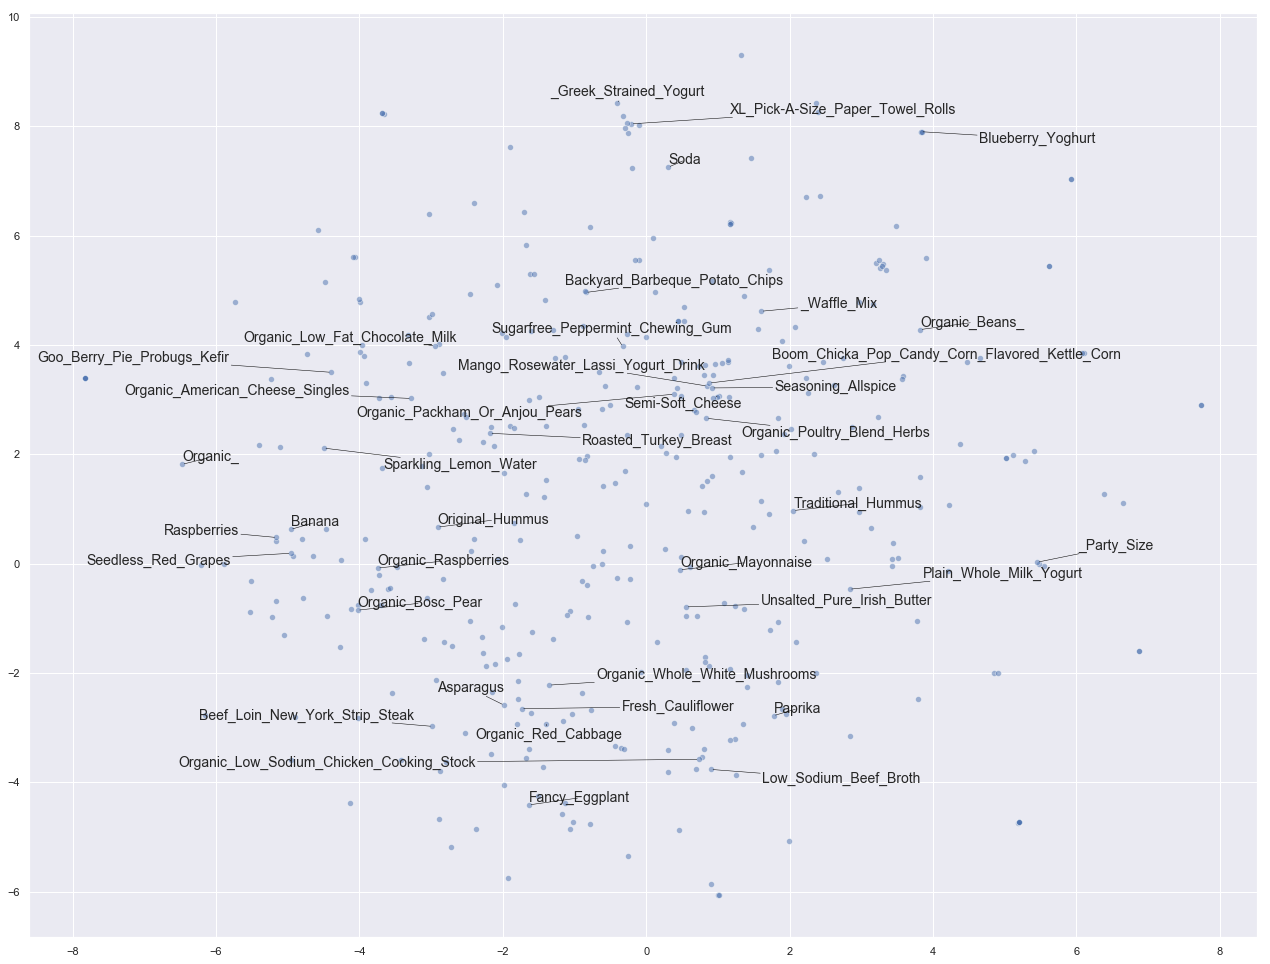

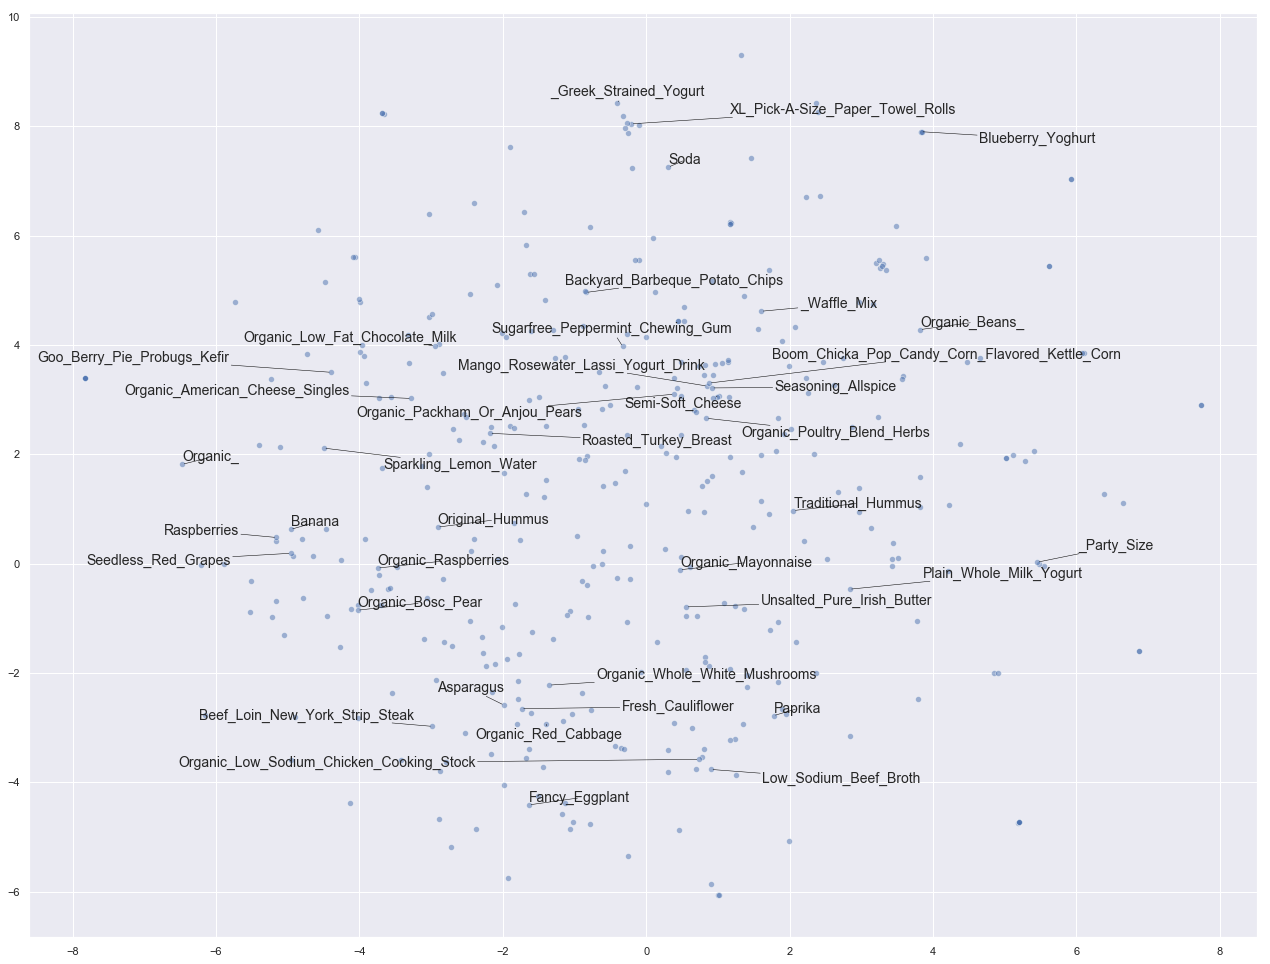

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (22, 17))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()
fig.savefig('word_embedding_visual.png')

In [102]:
# Interesting to see toil seat covers and kitchen bags together,  cheese and butter are close
# Back to clustering customers

tokenized.head()


user_id
1    [Soda, Original_Beef_Jerky, Pistachios, Organi...
2    [Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po...
5    [Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt...
7    [85, %, _Lean_Ground_Beef, Organic_Apple_Slice...
8    [Organic_Baby_Spinach, Michigan_Organic_Kale, ...
Name: product_name, dtype: object

user_id
1    [Soda, Original_Beef_Jerky, Pistachios, Organi...
2    [Artichoke_Spinach_Dip, Chipotle_Beef_, &, _Po...
5    [Uncured_Genoa_Salami, Plain_Whole_Milk_Yogurt...
7    [85, %, _Lean_Ground_Beef, Organic_Apple_Slice...
8    [Organic_Baby_Spinach, Michigan_Organic_Kale, ...
Name: product_name, dtype: object

In [103]:
len(tokenized)

131209

131209

In [104]:
product_vect = []

for i in tokenized_df.products:
    temp = []
    for e in i:
        temp.append(word2Vec[e])
    product_vect.append(np.mean(temp, axis=0)) #change axis of numpy.mean to get 100 axis

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [106]:
#list of word vectors 50
names = []
for i in range(len(product_vect[0])):
    names.append('word_vec_' + str(i))
print(names)

['word_vec_0', 'word_vec_1', 'word_vec_2', 'word_vec_3', 'word_vec_4', 'word_vec_5', 'word_vec_6', 'word_vec_7', 'word_vec_8', 'word_vec_9', 'word_vec_10', 'word_vec_11', 'word_vec_12', 'word_vec_13', 'word_vec_14', 'word_vec_15', 'word_vec_16', 'word_vec_17', 'word_vec_18', 'word_vec_19', 'word_vec_20', 'word_vec_21', 'word_vec_22', 'word_vec_23', 'word_vec_24', 'word_vec_25', 'word_vec_26', 'word_vec_27', 'word_vec_28', 'word_vec_29', 'word_vec_30', 'word_vec_31', 'word_vec_32', 'word_vec_33', 'word_vec_34', 'word_vec_35', 'word_vec_36', 'word_vec_37', 'word_vec_38', 'word_vec_39', 'word_vec_40', 'word_vec_41', 'word_vec_42', 'word_vec_43', 'word_vec_44', 'word_vec_45', 'word_vec_46', 'word_vec_47', 'word_vec_48', 'word_vec_49']
['word_vec_0', 'word_vec_1', 'word_vec_2', 'word_vec_3', 'word_vec_4', 'word_vec_5', 'word_vec_6', 'word_vec_7', 'word_vec_8', 'word_vec_9', 'word_vec_10', 'word_vec_11', 'word_vec_12', 'word_vec_13', 'word_vec_14', 'word_vec_15', 'word_vec_16', 'word_vec_17'

In [128]:
df_word_vec = pd.DataFrame(product_vect, columns=names)
df_word_vec['user_id'] = tokenized_df['user_id']
df_word_vec.head(10)

,word_vec_0,word_vec_1,word_vec_2,word_vec_3,word_vec_4,word_vec_5,word_vec_6,word_vec_7,word_vec_8,word_vec_9,...,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49,user_id
0,-0.849505,-0.666856,-0.004290,-1.387348,0.470005,0.167577,0.165705,0.274240,1.132918,-0.738560,...,1.155594,0.432676,-0.673879,1.526646,0.593997,-0.153208,-0.347352,0.300567,0.535715,1
1,-1.375668,0.384995,-0.045981,-0.044078,-0.107458,-0.021406,-0.439715,-0.645572,0.294181,-0.298823,...,-1.046117,-1.412388,-1.782706,-0.003318,0.154875,-1.486760,0.012854,1.078035,-0.140132,2
2,-0.816151,0.073212,0.517323,0.403151,0.573221,-0.264310,-1.959134,0.279234,0.123315,-0.004418,...,-1.055009,-1.205403,-2.005207,0.412077,0.095093,-1.668822,0.722295,0.266684,-0.025475,5
3,-1.463625,0.053687,0.290152,-0.426970,-0.216503,-0.577742,-1.377626,-0.188096,-0.450489,-0.510122,...,-0.405959,-0.895043,-1.641658,-0.277983,-0.148305,-1.504655,0.110724,-0.046774,-0.657013,7
4,-1.011445,0.028193,0.232879,0.458375,0.639441,0.209558,-1.327549,0.657848,-0.164953,0.394206,...,-2.211222,-2.008941,-0.979716,0.202994,0.821975,-2.851136,1.498697,0.123627,-0.029542,8
5,-1.063869,0.339357,0.099217,0.086361,-0.430061,-0.089156,-0.444236,-0.615202,0.208711,-0.521668,...,-0.265889,-1.196927,-1.617347,-0.279724,-0.328919,-1.416233,0.058779,0.955871,-0.299343,9
6,-0.855763,-0.306073,-0.030886,0.104746,0.277625,-0.152224,-1.807943,0.090981,0.103666,0.461510,...,-1.736966,-1.573796,-1.505342,0.195559,0.267881,-2.450749,1.340340,0.548795,0.073173,10
7,-0.639867,0.358049,0.226305,0.086485,1.194505,-0.145073,-0.857116,0.263215,0.582362,-0.056997,...,-1.019709,-0.338185,-0.441160,0.363218,0.884962,-0.936142,-0.261039,0.474182,0.469282,13
8,0.583332,0.558730,0.637789,0.248786,0.791076,0.417989,-0.202636,0.238945,-0.442582,0.001559,...,-0.577115,0.411717,0.252518,-0.423613,-0.070027,-0.125314,-0.839237,-0.272406,0.094723,14
9,0.312227,-0.039596,0.040423,-0.535542,0.787380,-0.071255,-0.270256,-0.785676,-0.242597,-0.303481,...,-0.555035,0.037249,0.544431,-0.566105,-0.099669,0.462049,-0.570785,-0.422024,-0.169269,17


,word_vec_0,word_vec_1,word_vec_2,word_vec_3,word_vec_4,word_vec_5,word_vec_6,word_vec_7,word_vec_8,word_vec_9,...,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49,user_id
0,-0.849505,-0.666856,-0.004290,-1.387348,0.470005,0.167577,0.165705,0.274240,1.132918,-0.738560,...,1.155594,0.432676,-0.673879,1.526646,0.593997,-0.153208,-0.347352,0.300567,0.535715,1
1,-1.375668,0.384995,-0.045981,-0.044078,-0.107458,-0.021406,-0.439715,-0.645572,0.294181,-0.298823,...,-1.046117,-1.412388,-1.782706,-0.003318,0.154875,-1.486760,0.012854,1.078035,-0.140132,2
2,-0.816151,0.073212,0.517323,0.403151,0.573221,-0.264310,-1.959134,0.279234,0.123315,-0.004418,...,-1.055009,-1.205403,-2.005207,0.412077,0.095093,-1.668822,0.722295,0.266684,-0.025475,5
3,-1.463625,0.053687,0.290152,-0.426970,-0.216503,-0.577742,-1.377626,-0.188096,-0.450489,-0.510122,...,-0.405959,-0.895043,-1.641658,-0.277983,-0.148305,-1.504655,0.110724,-0.046774,-0.657013,7
4,-1.011445,0.028193,0.232879,0.458375,0.639441,0.209558,-1.327549,0.657848,-0.164953,0.394206,...,-2.211222,-2.008941,-0.979716,0.202994,0.821975,-2.851136,1.498697,0.123627,-0.029542,8
5,-1.063869,0.339357,0.099217,0.086361,-0.430061,-0.089156,-0.444236,-0.615202,0.208711,-0.521668,...,-0.265889,-1.196927,-1.617347,-0.279724,-0.328919,-1.416233,0.058779,0.955871,-0.299343,9
6,-0.855763,-0.306073,-0.030886,0.104746,0.277625,-0.152224,-1.807943,0.090981,0.103666,0.461510,...,-1.736966,-1.573796,-1.505342,0.195559,0.267881,-2.450749,1.340340,0.548795,0.073173,10
7,-0.639867,0.358049,0.226305,0.086485,1.194505,-0.145073,-0.857116,0.263215,0.582362,-0.056997,...,-1.019709,-0.338185,-0.441160,0.363218,0.884962,-0.936142,-0.261039,0.474182,0.469282,13
8,0.583332,0.558730,0.637789,0.248786,0.791076,0.417989,-0.202636,0.238945,-0.442582,0.001559,...,-0.577115,0.411717,0.252518,-0.423613,-0.070027,-0.125314,-0.839237,-0.272406,0.094723,14
9,0.312227,-0.039596,0.040423,-0.535542,0.787380,-0.071255,-0.270256,-0.785676,-0.242597,-0.303481,...,-0.555035,0.037249,0.544431,-0.566105,-0.099669,0.462049,-0.570785,-0.422024,-0.169269,17


In [132]:
final_df = pd.merge(user_avg, df_word_vec, on='user_id')
final_df.head(10)

,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name,word_vec_0,word_vec_1,word_vec_2,...,word_vec_40,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49
0,1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...,-0.849505,-0.666856,-0.004290,...,-0.470057,1.155594,0.432676,-0.673879,1.526646,0.593997,-0.153208,-0.347352,0.300567,0.535715
1,2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...,-1.375668,0.384995,-0.045981,...,0.026694,-1.046117,-1.412388,-1.782706,-0.003318,0.154875,-1.486760,0.012854,1.078035,-0.140132
2,5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...,-0.816151,0.073212,0.517323,...,0.652236,-1.055009,-1.205403,-2.005207,0.412077,0.095093,-1.668822,0.722295,0.266684,-0.025475
3,7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...,-1.463625,0.053687,0.290152,...,-0.123054,-0.405959,-0.895043,-1.641658,-0.277983,-0.148305,-1.504655,0.110724,-0.046774,-0.657013
4,8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...,-1.011445,0.028193,0.232879,...,0.702411,-2.211222,-2.008941,-0.979716,0.202994,0.821975,-2.851136,1.498697,0.123627,-0.029542
5,9,2.697368,14.263158,24.260870,3,76,Almond_Non-Dairy_Yogurt_Made_From_Real_Almonds...,-1.063869,0.339357,0.099217,...,-0.197064,-0.265889,-1.196927,-1.617347,-0.279724,-0.328919,-1.416233,0.058779,0.955871,-0.299343
6,10,4.013986,16.902098,20.746377,5,143,Asparagus New_York_Style_Nova_Lox Organic_Broc...,-0.855763,-0.306073,-0.030886,...,0.311872,-1.736966,-1.573796,-1.505342,0.195559,0.267881,-2.450749,1.340340,0.548795,0.073173
7,13,3.098765,15.135802,7.381579,12,81,Half_&_Half Whole_Wheat_Pita_Bread_Loaves Lent...,-0.639867,0.358049,0.226305,...,1.119308,-1.019709,-0.338185,-0.441160,0.363218,0.884962,-0.936142,-0.261039,0.474182,0.469282
8,14,4.076190,8.952381,24.570732,13,210,Anaheim_Pepper Mixed_Vegetables Jalapeno_Peppe...,0.583332,0.558730,0.637789,...,0.073848,-0.577115,0.411717,0.252518,-0.423613,-0.070027,-0.125314,-0.839237,-0.272406,0.094723
9,17,3.316327,13.496599,8.268041,40,294,Natural_Lime_Flavor_Sparkling_Mineral_Water Gr...,0.312227,-0.039596,0.040423,...,-0.214516,-0.555035,0.037249,0.544431,-0.566105,-0.099669,0.462049,-0.570785,-0.422024,-0.169269


,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name,word_vec_0,word_vec_1,word_vec_2,...,word_vec_40,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49
0,1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...,-0.849505,-0.666856,-0.004290,...,-0.470057,1.155594,0.432676,-0.673879,1.526646,0.593997,-0.153208,-0.347352,0.300567,0.535715
1,2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...,-1.375668,0.384995,-0.045981,...,0.026694,-1.046117,-1.412388,-1.782706,-0.003318,0.154875,-1.486760,0.012854,1.078035,-0.140132
2,5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...,-0.816151,0.073212,0.517323,...,0.652236,-1.055009,-1.205403,-2.005207,0.412077,0.095093,-1.668822,0.722295,0.266684,-0.025475
3,7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...,-1.463625,0.053687,0.290152,...,-0.123054,-0.405959,-0.895043,-1.641658,-0.277983,-0.148305,-1.504655,0.110724,-0.046774,-0.657013
4,8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...,-1.011445,0.028193,0.232879,...,0.702411,-2.211222,-2.008941,-0.979716,0.202994,0.821975,-2.851136,1.498697,0.123627,-0.029542
5,9,2.697368,14.263158,24.260870,3,76,Almond_Non-Dairy_Yogurt_Made_From_Real_Almonds...,-1.063869,0.339357,0.099217,...,-0.197064,-0.265889,-1.196927,-1.617347,-0.279724,-0.328919,-1.416233,0.058779,0.955871,-0.299343
6,10,4.013986,16.902098,20.746377,5,143,Asparagus New_York_Style_Nova_Lox Organic_Broc...,-0.855763,-0.306073,-0.030886,...,0.311872,-1.736966,-1.573796,-1.505342,0.195559,0.267881,-2.450749,1.340340,0.548795,0.073173
7,13,3.098765,15.135802,7.381579,12,81,Half_&_Half Whole_Wheat_Pita_Bread_Loaves Lent...,-0.639867,0.358049,0.226305,...,1.119308,-1.019709,-0.338185,-0.441160,0.363218,0.884962,-0.936142,-0.261039,0.474182,0.469282
8,14,4.076190,8.952381,24.570732,13,210,Anaheim_Pepper Mixed_Vegetables Jalapeno_Peppe...,0.583332,0.558730,0.637789,...,0.073848,-0.577115,0.411717,0.252518,-0.423613,-0.070027,-0.125314,-0.839237,-0.272406,0.094723
9,17,3.316327,13.496599,8.268041,40,294,Natural_Lime_Flavor_Sparkling_Mineral_Water Gr...,0.312227,-0.039596,0.040423,...,-0.214516,-0.555035,0.037249,0.544431,-0.566105,-0.099669,0.462049,-0.570785,-0.422024,-0.169269


In [133]:
X = pd.DataFrame()
X = final_df
X = X.drop('product_name',axis=1)
X.head()

,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,word_vec_0,word_vec_1,word_vec_2,word_vec_3,...,word_vec_40,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49
0,1,2.644068,10.542373,20.259259,10,59,-0.849505,-0.666856,-0.004290,-1.387348,...,-0.470057,1.155594,0.432676,-0.673879,1.526646,0.593997,-0.153208,-0.347352,0.300567,0.535715
1,2,2.005128,10.441026,15.967033,14,195,-1.375668,0.384995,-0.045981,-0.044078,...,0.026694,-1.046117,-1.412388,-1.782706,-0.003318,0.154875,-1.486760,0.012854,1.078035,-0.140132
2,5,1.621622,15.729730,14.500000,4,37,-0.816151,0.073212,0.517323,0.403151,...,0.652236,-1.055009,-1.205403,-2.005207,0.412077,0.095093,-1.668822,0.722295,0.266684,-0.025475
3,7,1.728155,13.631068,13.546392,20,206,-1.463625,0.053687,0.290152,-0.426970,...,-0.123054,-0.405959,-0.895043,-1.641658,-0.277983,-0.148305,-1.504655,0.110724,-0.046774,-0.657013
4,8,4.204082,2.448980,30.000000,3,49,-1.011445,0.028193,0.232879,0.458375,...,0.702411,-2.211222,-2.008941,-0.979716,0.202994,0.821975,-2.851136,1.498697,0.123627,-0.029542


,user_id,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,word_vec_0,word_vec_1,word_vec_2,word_vec_3,...,word_vec_40,word_vec_41,word_vec_42,word_vec_43,word_vec_44,word_vec_45,word_vec_46,word_vec_47,word_vec_48,word_vec_49
0,1,2.644068,10.542373,20.259259,10,59,-0.849505,-0.666856,-0.004290,-1.387348,...,-0.470057,1.155594,0.432676,-0.673879,1.526646,0.593997,-0.153208,-0.347352,0.300567,0.535715
1,2,2.005128,10.441026,15.967033,14,195,-1.375668,0.384995,-0.045981,-0.044078,...,0.026694,-1.046117,-1.412388,-1.782706,-0.003318,0.154875,-1.486760,0.012854,1.078035,-0.140132
2,5,1.621622,15.729730,14.500000,4,37,-0.816151,0.073212,0.517323,0.403151,...,0.652236,-1.055009,-1.205403,-2.005207,0.412077,0.095093,-1.668822,0.722295,0.266684,-0.025475
3,7,1.728155,13.631068,13.546392,20,206,-1.463625,0.053687,0.290152,-0.426970,...,-0.123054,-0.405959,-0.895043,-1.641658,-0.277983,-0.148305,-1.504655,0.110724,-0.046774,-0.657013
4,8,4.204082,2.448980,30.000000,3,49,-1.011445,0.028193,0.232879,0.458375,...,0.702411,-2.211222,-2.008941,-0.979716,0.202994,0.821975,-2.851136,1.498697,0.123627,-0.029542


In [134]:
# k selection using elbow method

from sklearn.cluster import KMeans

cluster = KMeans(n_clusters = 5)
X['cluster_5'] = cluster.fit_predict(X)
print(cluster.inertia_)

18626600237541.94
18626600237541.94


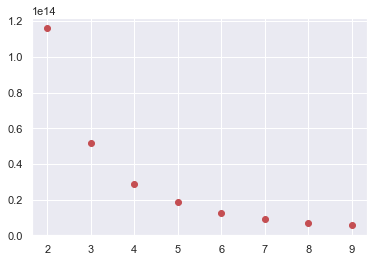

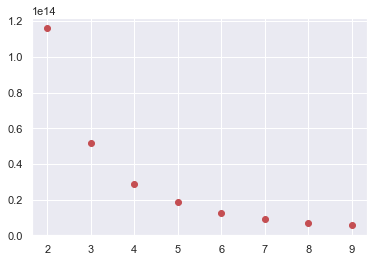

In [135]:
# plot inertia and look for bend
x = list(range(2,10))
y = []
for i in x:
    cluster = KMeans(n_clusters=i)
    model = cluster.fit_predict(X)
    y.append(cluster.inertia_)

plt.plot(x,y, 'ro')

In [136]:
# using 5 as optimal K value, fit and predict
clusterer = KMeans(n_clusters =5, random_state=1)
cluster = clusterer.fit_predict(X)

In [137]:
# Use PCA to visualize clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
existing_2d = pca.fit_transform(X)
xs = existing_2d[:,0]

ys = existing_2d[:,1]

new_df = pd.DataFrame(X.index)
new_df['cluster'] = cluster
new_df['x'] = xs
new_df['y'] = ys

#See balance of clusters
print(new_df.cluster.value_counts())

4    26470
3    26278
2    26216
1    26145
0    26100
Name: cluster, dtype: int64
4    26470
3    26278
2    26216
1    26145
0    26100
Name: cluster, dtype: int64


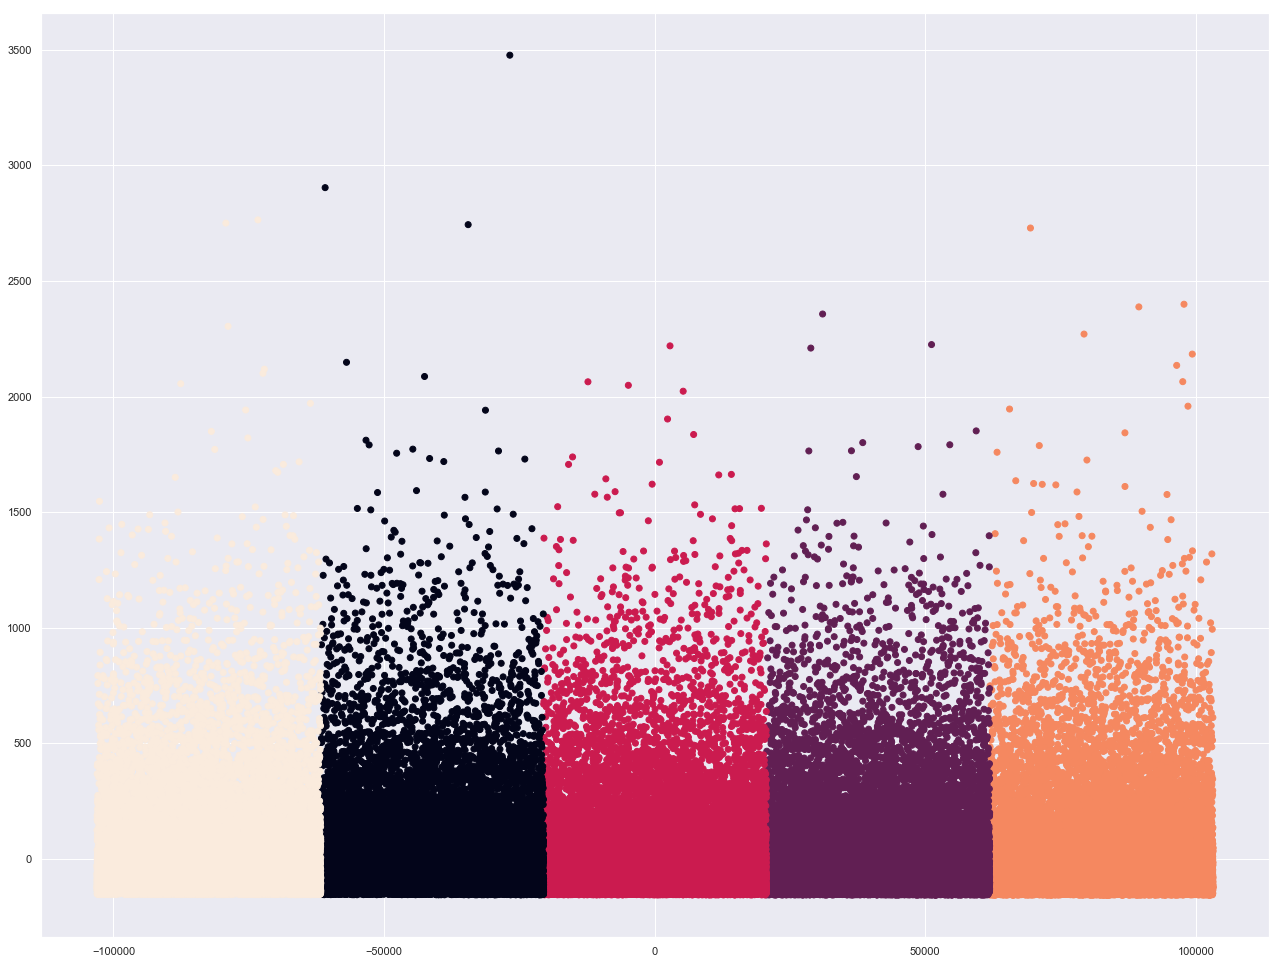

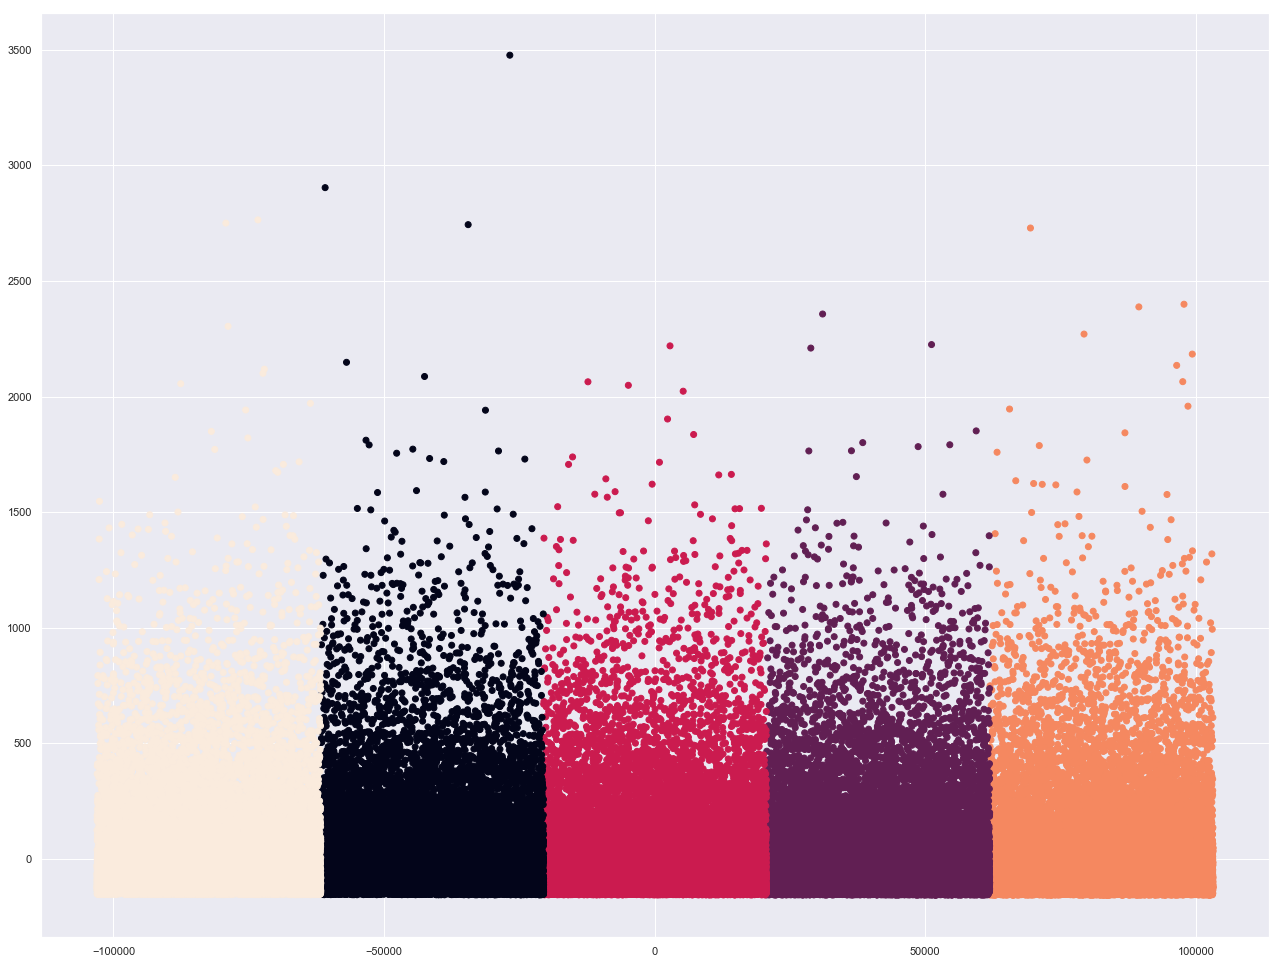

In [138]:
fig, ax = plt.subplots(figsize = (22, 17))
plt.scatter(xs,ys, c=cluster)
plt.show()

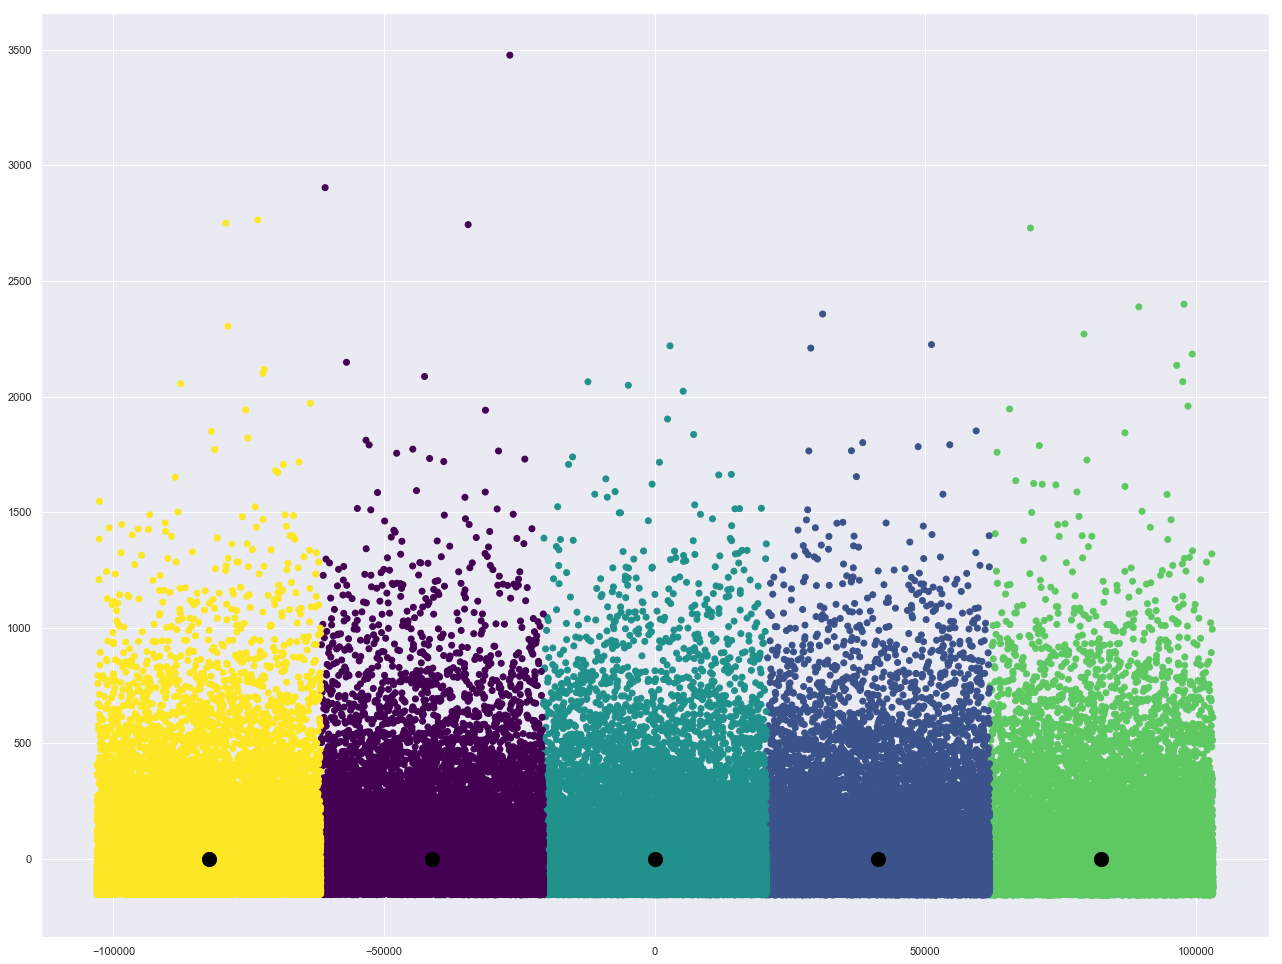

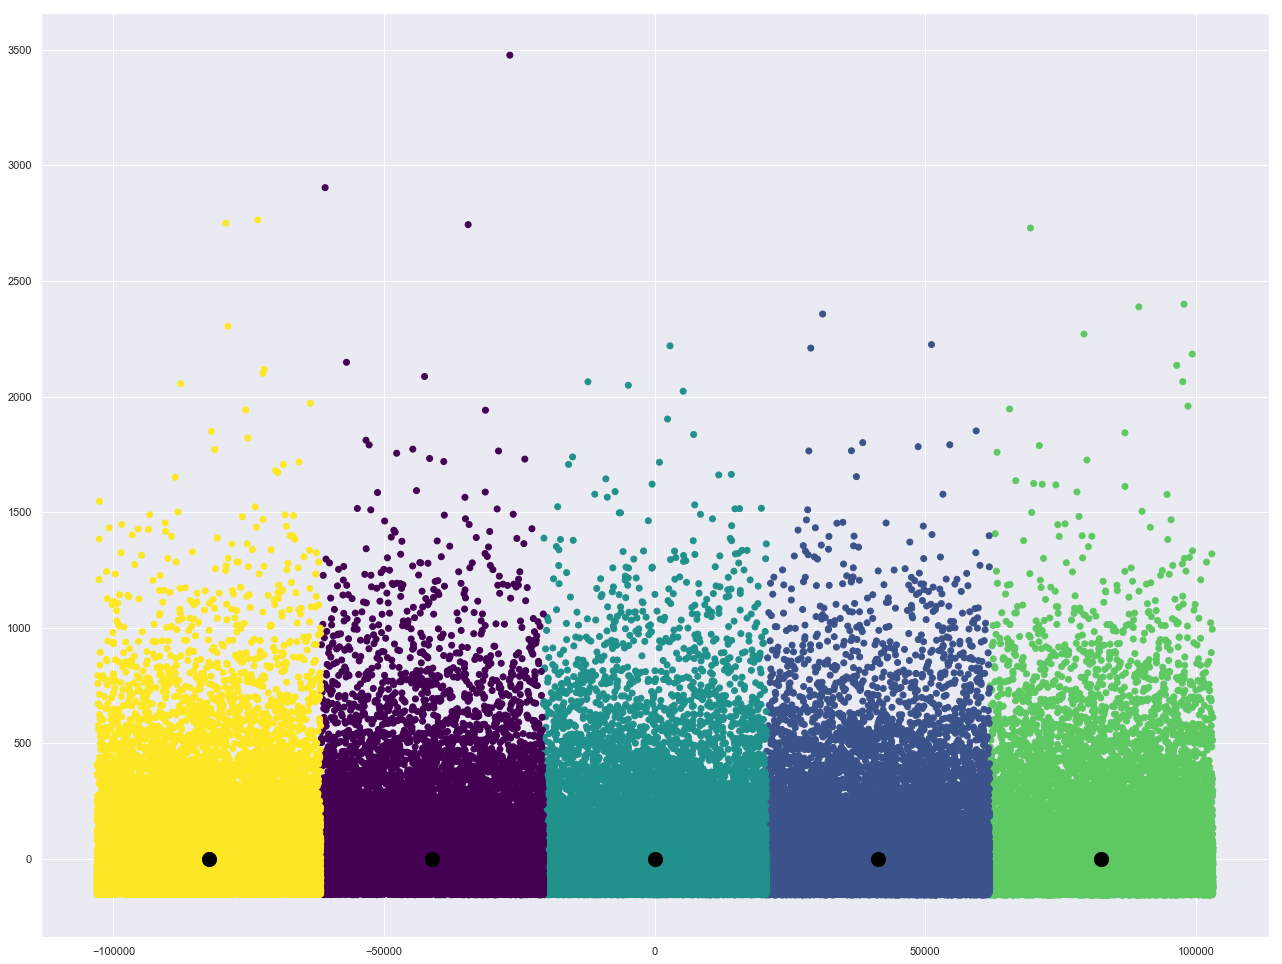

In [139]:
centers = pca.transform(clusterer.cluster_centers_)

fig, ax = plt.subplots(figsize = (22, 17))
plt.scatter(xs,ys, c=cluster, cmap='viridis')

plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha= 1)

In [140]:
user_avg.head()

,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name
user_id,,,,,,
1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...
2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...
5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...
7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...
8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...


,order_dow,order_hour_of_day,days_since_prior_order,num_of_orders,num_of_products,product_name
user_id,,,,,,
1,2.644068,10.542373,20.259259,10,59,Soda Original_Beef_Jerky Pistachios Organic_St...
2,2.005128,10.441026,15.967033,14,195,Artichoke_Spinach_Dip Chipotle_Beef_&_Pork_Rea...
5,1.621622,15.729730,14.500000,4,37,Uncured_Genoa_Salami Plain_Whole_Milk_Yogurt W...
7,1.728155,13.631068,13.546392,20,206,85%_Lean_Ground_Beef Organic_Apple_Slices Appl...
8,4.204082,2.448980,30.000000,3,49,Organic_Baby_Spinach Michigan_Organic_Kale Bag...


In [141]:
# 0, 1 is the coordinate of the user

pca_df = pd.DataFrame(existing_2d)
pca_df['user_id'] = user_avg.index
pca_df['cluster'] = clusterer.predict(X)
pca_df.head(10)

,0,1,user_id,cluster
0,103165.823784,-100.145197,1,3
1,103164.825888,35.887742,2,3
2,103161.823440,-122.388484,5,3
3,103159.826066,47.294740,7,3
4,103158.823616,-110.716293,8,3
5,103157.824034,-83.694638,9,3
6,103156.825072,-16.663882,10,3
7,103153.824132,-77.855225,13,3
8,103152.826112,50.637922,14,3
9,103149.827452,136.483106,17,3


,0,1,user_id,cluster
0,103165.823784,-100.145197,1,3
1,103164.825888,35.887742,2,3
2,103161.823440,-122.388484,5,3
3,103159.826066,47.294740,7,3
4,103158.823616,-110.716293,8,3
5,103157.824034,-83.694638,9,3
6,103156.825072,-16.663882,10,3
7,103153.824132,-77.855225,13,3
8,103152.826112,50.637922,14,3
9,103149.827452,136.483106,17,3


In [142]:
# Show most popular products in each cluster

cluster_order_info = pd.merge(pca_df, Prior_User_Order_Product_inner, how='left', on='user_id')

In [143]:
cluster_product = cluster_order_info[['user_id','cluster','product_no_space']]

In [144]:
# count the frequency of products in each cluster
cluster_count = cluster_product.groupby(['cluster','product_no_space']).agg('count')

# Top 10 products in each cluster
top_products = cluster_count['user_id'].groupby(level=0, group_keys=False).nlargest(10).reset_index()

In [145]:
top_products[top_products['cluster'] == 0][['product_no_space','user_id']]

,product_no_space,user_id
0,Banana,59339
1,Bag_of_Organic_Bananas,46706
2,Organic_Strawberries,33748
3,Organic_Baby_Spinach,29799
4,Organic_Hass_Avocado,26866
5,Organic_Avocado,22211
6,Large_Lemon,19324
7,Limes,17779
8,Strawberries,17638
9,Organic_Whole_Milk,17453


,product_no_space,user_id
0,Banana,59339
1,Bag_of_Organic_Bananas,46706
2,Organic_Strawberries,33748
3,Organic_Baby_Spinach,29799
4,Organic_Hass_Avocado,26866
5,Organic_Avocado,22211
6,Large_Lemon,19324
7,Limes,17779
8,Strawberries,17638
9,Organic_Whole_Milk,17453


In [146]:
top_products[top_products['cluster'] == 1][['product_no_space','user_id']]

,product_no_space,user_id
10,Banana,60074
11,Bag_of_Organic_Bananas,48479
12,Organic_Strawberries,33709
13,Organic_Baby_Spinach,30977
14,Organic_Hass_Avocado,27992
15,Organic_Avocado,22607
16,Large_Lemon,19278
17,Limes,17909
18,Strawberries,17894
19,Organic_Raspberries,17612


,product_no_space,user_id
10,Banana,60074
11,Bag_of_Organic_Bananas,48479
12,Organic_Strawberries,33709
13,Organic_Baby_Spinach,30977
14,Organic_Hass_Avocado,27992
15,Organic_Avocado,22607
16,Large_Lemon,19278
17,Limes,17909
18,Strawberries,17894
19,Organic_Raspberries,17612


In [147]:
top_products[top_products['cluster'] == 2][['product_no_space','user_id']]

,product_no_space,user_id
20,Banana,60803
21,Bag_of_Organic_Bananas,47475
22,Organic_Strawberries,33855
23,Organic_Baby_Spinach,30848
24,Organic_Hass_Avocado,26527
25,Organic_Avocado,22112
26,Large_Lemon,19407
27,Limes,18367
28,Strawberries,18249
29,Organic_Whole_Milk,17871


,product_no_space,user_id
20,Banana,60803
21,Bag_of_Organic_Bananas,47475
22,Organic_Strawberries,33855
23,Organic_Baby_Spinach,30848
24,Organic_Hass_Avocado,26527
25,Organic_Avocado,22112
26,Large_Lemon,19407
27,Limes,18367
28,Strawberries,18249
29,Organic_Whole_Milk,17871


In [148]:
top_products[top_products['cluster'] == 3][['product_no_space','user_id']]

,product_no_space,user_id
30,Banana,61109
31,Bag_of_Organic_Bananas,47966
32,Organic_Strawberries,33420
33,Organic_Baby_Spinach,31543
34,Organic_Hass_Avocado,28249
35,Organic_Avocado,23131
36,Large_Lemon,19406
37,Strawberries,18328
38,Organic_Raspberries,17778
39,Organic_Whole_Milk,17768


,product_no_space,user_id
30,Banana,61109
31,Bag_of_Organic_Bananas,47966
32,Organic_Strawberries,33420
33,Organic_Baby_Spinach,31543
34,Organic_Hass_Avocado,28249
35,Organic_Avocado,23131
36,Large_Lemon,19406
37,Strawberries,18328
38,Organic_Raspberries,17778
39,Organic_Whole_Milk,17768


In [149]:
top_products[top_products['cluster'] == 4][['product_no_space','user_id']]

,product_no_space,user_id
40,Banana,59439
41,Bag_of_Organic_Bananas,49113
42,Organic_Strawberries,33810
43,Organic_Baby_Spinach,30892
44,Organic_Hass_Avocado,26796
45,Organic_Avocado,23193
46,Large_Lemon,19776
47,Strawberries,18375
48,Limes,17852
49,Organic_Whole_Milk,17714


,product_no_space,user_id
40,Banana,59439
41,Bag_of_Organic_Bananas,49113
42,Organic_Strawberries,33810
43,Organic_Baby_Spinach,30892
44,Organic_Hass_Avocado,26796
45,Organic_Avocado,23193
46,Large_Lemon,19776
47,Strawberries,18375
48,Limes,17852
49,Organic_Whole_Milk,17714


In [150]:
wide_top_products =top_products.pivot(index='cluster', columns='product_no_space', values='user_id').fillna(0)
wide_top_products_percent = wide_top_products.div(wide_top_products.sum(axis=0), axis=1)
long_top_products = wide_top_products_percent.unstack().reset_index()
long_top_products.columns.values[2]='count'

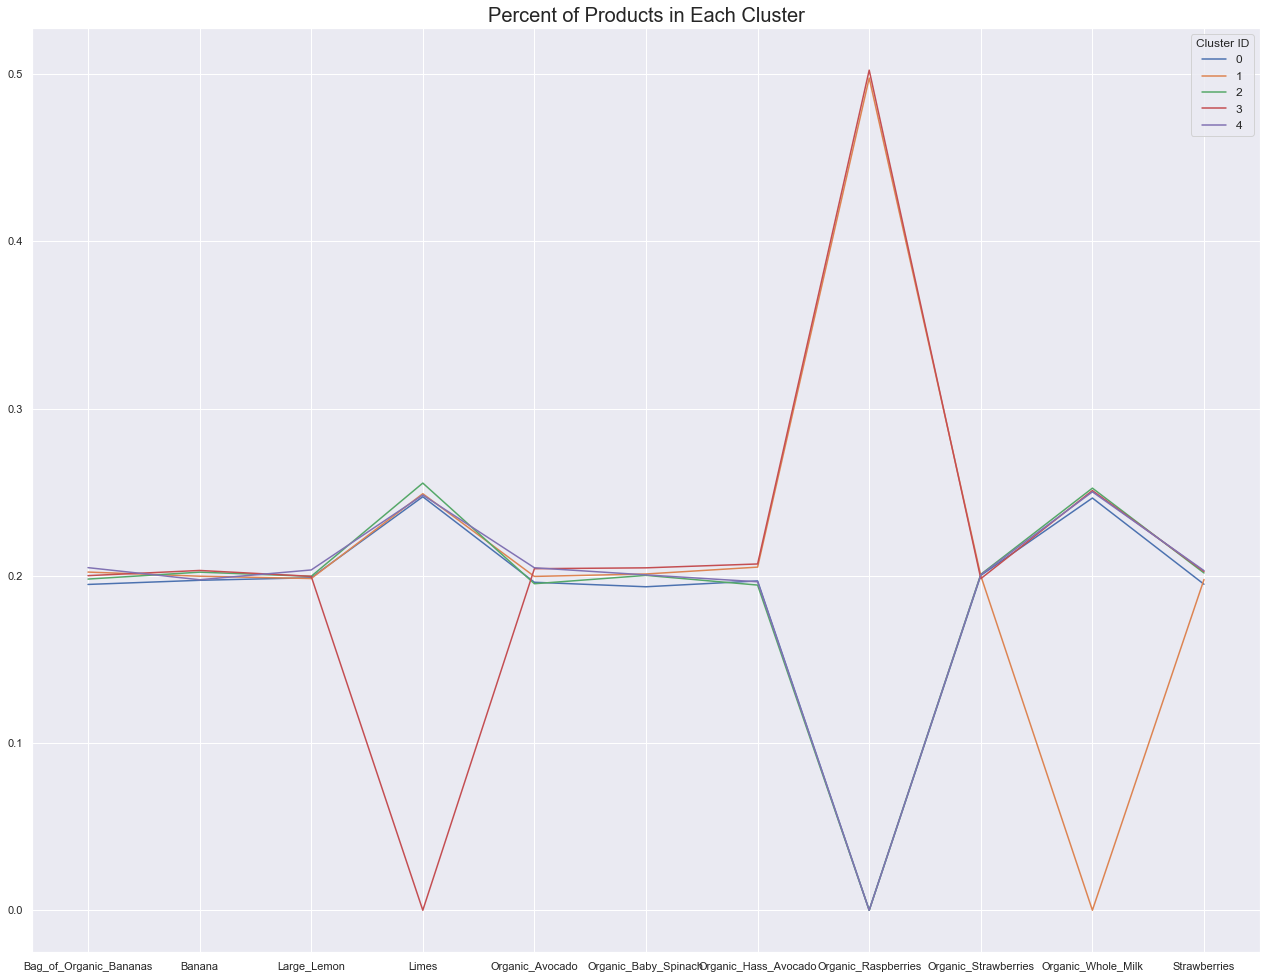

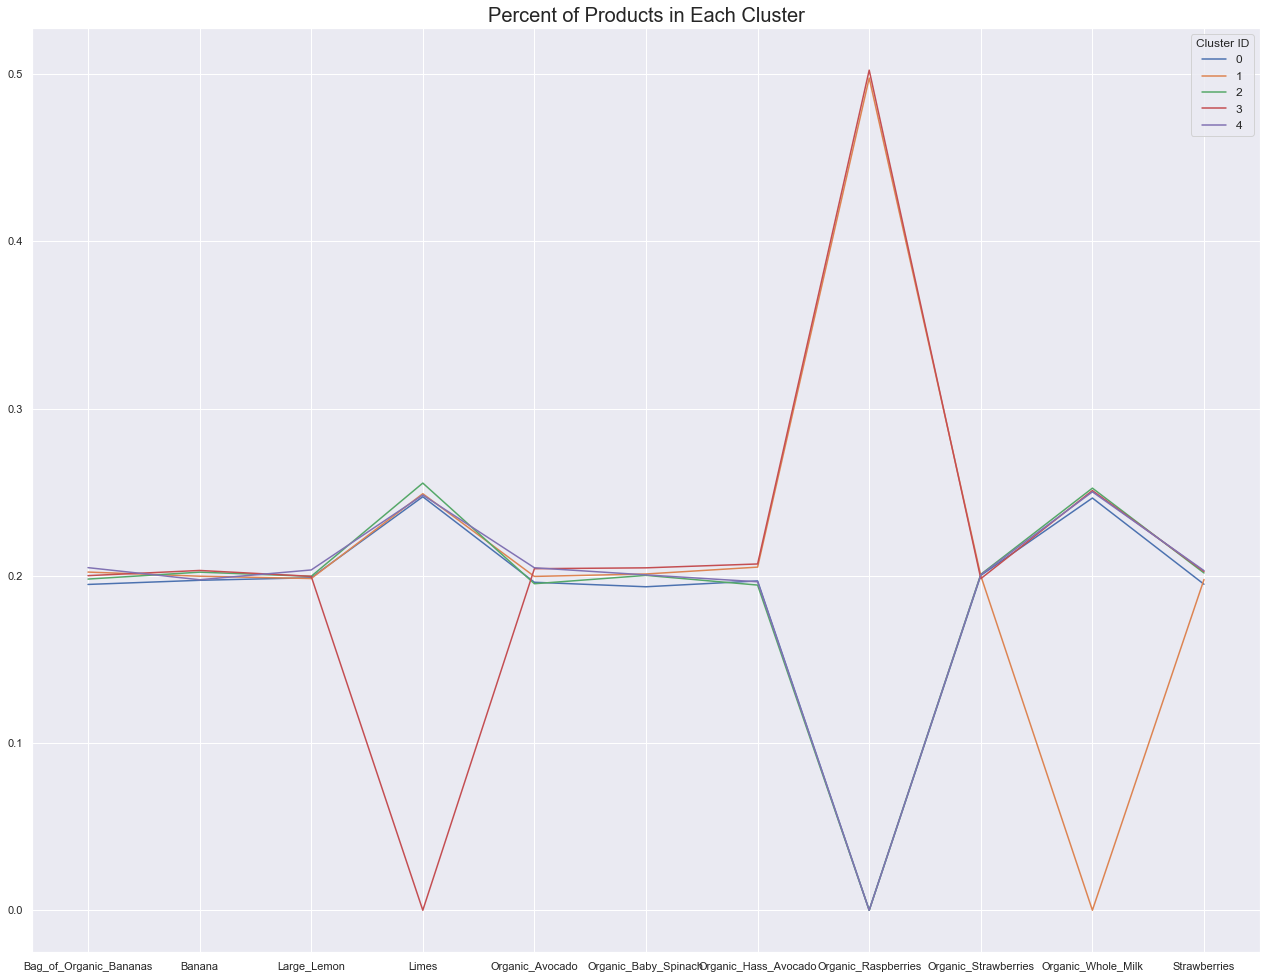

In [154]:
fig, ax1 = plt.subplots(figsize = (22, 17))

group1 = []
for i in range(5):
    group1.append(i)
ax1.plot(wide_top_products_percent.loc[group1].transpose())
ax1.legend(wide_top_products_percent.transpose().columns[0:10],title="Cluster ID",loc='upper right',prop={'size': 12})
ax1.set_title('Percent of Products in Each Cluster',size=20)

plt.show()
fig.set_dpi(300)
fig.savefig('cluster_product_frequency.png')